In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('students_final.csv')

In [5]:
df['Success'] = (df['FinalGrade'] >= 80).astype(int)

In [6]:
features = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities']
X = df[features]
y = df['Success']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Логистическия регрессия


1. LOGISTIC REGRESSION
Accuracy:  0.609
Precision: 0.609
F1-Score:  0.757


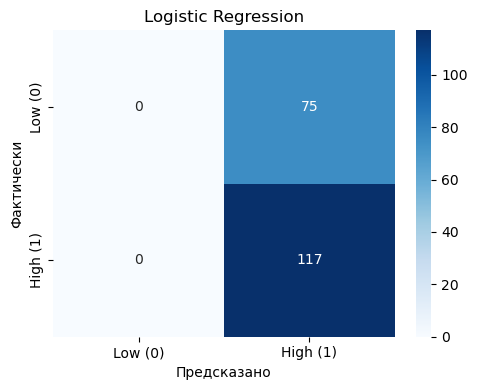


Влияние признаков:
                  Признак  Коэффициент
ExtracurricularActivities    -0.067015
           AttendanceRate     0.035991
        StudyHoursPerWeek     0.029696
            PreviousGrade    -0.027720


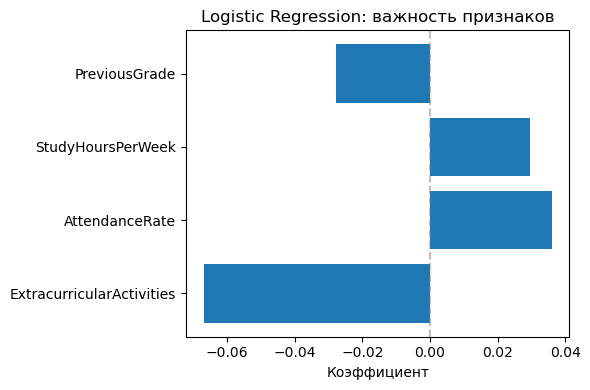

In [11]:
from sklearn.linear_model import LogisticRegression

print("\n" + "="*50)
print("1. LOGISTIC REGRESSION")
print("="*50)

# Модель
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

# Метрики
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('Logistic Regression')
plt.tight_layout()
plt.show()

# Важность признаков (коэффициенты)
coef_df = pd.DataFrame({
    'Признак': features,
    'Коэффициент': logreg.coef_[0]
}).sort_values('Коэффициент', key=abs, ascending=False)

print("\nВлияние признаков:")
print(coef_df.to_string(index=False))

# Визуализация коэффициентов
plt.figure(figsize=(6, 4))
plt.barh(coef_df['Признак'], coef_df['Коэффициент'])
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Коэффициент')
plt.title('Logistic Regression: важность признаков')
plt.tight_layout()
plt.show()

## Случайный лес


2. RANDOM FOREST
Accuracy:  0.547
Precision: 0.604
F1-Score:  0.667


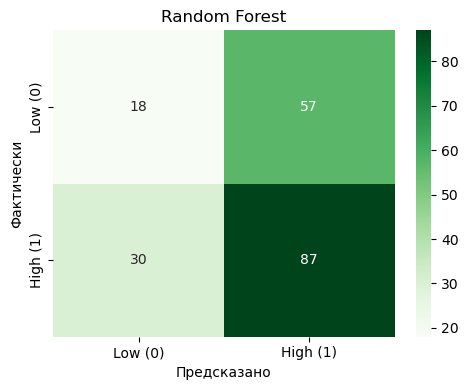


Важность признаков:
                  Признак  Важность
            PreviousGrade  0.290382
        StudyHoursPerWeek  0.290199
           AttendanceRate  0.262787
ExtracurricularActivities  0.156632


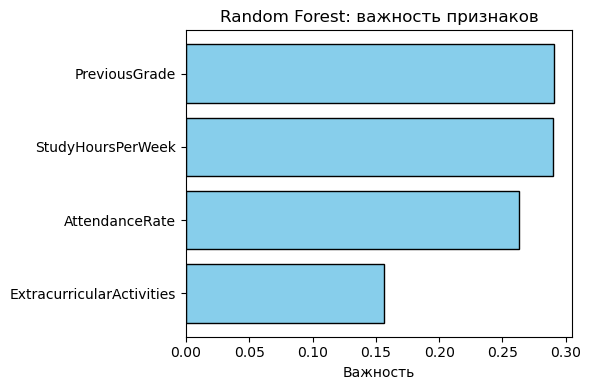

In [12]:
from sklearn.ensemble import RandomForestClassifier

print("\n" + "="*50)
print("2. RANDOM FOREST")
print("="*50)

# Модель
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # не требует масштабирования
y_pred = rf.predict(X_test)

# Метрики
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('Random Forest')
plt.tight_layout()
plt.show()

# Важность признаков
importances = pd.DataFrame({
    'Признак': features,
    'Важность': rf.feature_importances_
}).sort_values('Важность', ascending=False)

print("\nВажность признаков:")
print(importances.to_string(index=False))

# Визуализация
plt.figure(figsize=(6, 4))
plt.barh(importances['Признак'], importances['Важность'], color='skyblue', edgecolor='black')
plt.xlabel('Важность')
plt.title('Random Forest: важность признаков')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Метод ближайших соседей


3. K-NEAREST NEIGHBORS


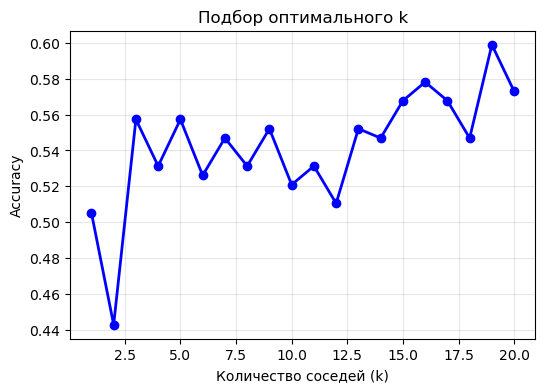

Оптимальное k: 19 (Accuracy: 0.599)

Accuracy:  0.599
Precision: 0.622
F1-Score:  0.726


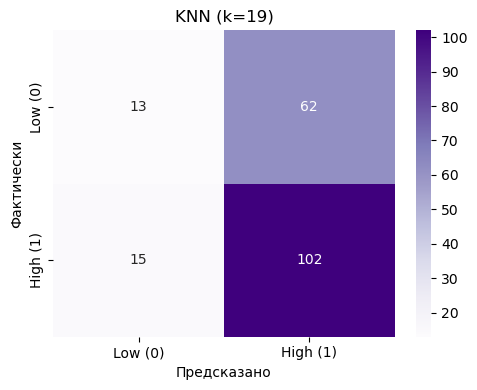

In [14]:
from sklearn.neighbors import KNeighborsClassifier

print("\n" + "="*50)
print("3. K-NEAREST NEIGHBORS")
print("="*50)

# Подбор оптимального k
k_scores = []
k_range = range(1, 21)
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    k_scores.append(knn_temp.score(X_test_scaled, y_test))

plt.figure(figsize=(6, 4))
plt.plot(k_range, k_scores, 'bo-', linewidth=2)
plt.xlabel('Количество соседей (k)')
plt.ylabel('Accuracy')
plt.title('Подбор оптимального k')
plt.grid(alpha=0.3)
plt.show()

# Лучшее k
best_k = k_range[np.argmax(k_scores)]
print(f"Оптимальное k: {best_k} (Accuracy: {max(k_scores):.3f})")

# Финальная модель
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Метрики
print(f"\nAccuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title(f'KNN (k={best_k})')
plt.tight_layout()
plt.show()


4. SUPPORT VECTOR MACHINE (SVM)
Accuracy:  0.594
Precision: 0.604
F1-Score:  0.743


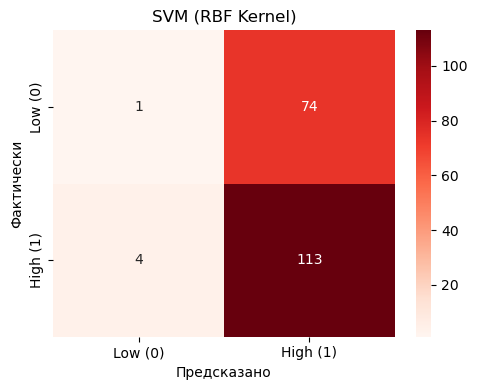

In [18]:
from sklearn.svm import SVC

print("\n" + "="*50)
print("4. SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

# Модель (с ядром RBF)
svm = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# Метрики
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('SVM (RBF Kernel)')
plt.tight_layout()
plt.show()


5. GRADIENT BOOSTING
Accuracy:  0.573
Precision: 0.606
F1-Score:  0.709


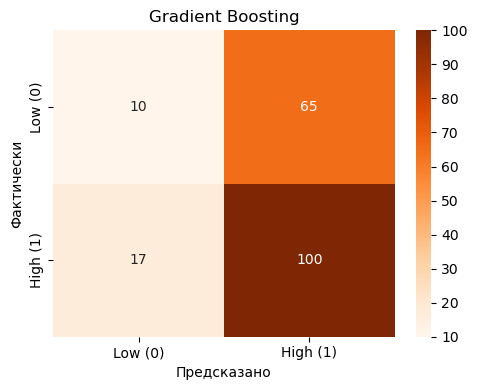


Важность признаков:
                  Признак  Важность
        StudyHoursPerWeek  0.311252
            PreviousGrade  0.278981
           AttendanceRate  0.262265
ExtracurricularActivities  0.147502


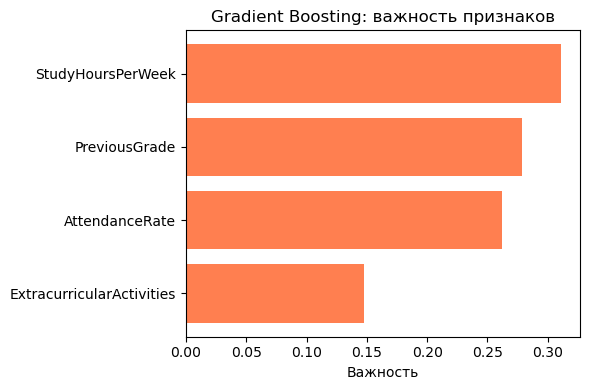

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

print("\n" + "="*50)
print("5. GRADIENT BOOSTING")
print("="*50)

# Модель
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                 max_depth=3, random_state=42)
gb.fit(X_train, y_train)  # не требует масштабирования
y_pred = gb.predict(X_test)

# Метрики
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('Gradient Boosting')
plt.tight_layout()
plt.show()

# Важность признаков
importances = pd.DataFrame({
    'Признак': features,
    'Важность': gb.feature_importances_
}).sort_values('Важность', ascending=False)

print("\nВажность признаков:")
print(importances.to_string(index=False))

plt.figure(figsize=(6, 4))
plt.barh(importances['Признак'], importances['Важность'], color='coral')
plt.xlabel('Важность')
plt.title('Gradient Boosting: важность признаков')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


6. DECISION TREE
Accuracy:  0.594
Precision: 0.609
F1-Score:  0.736


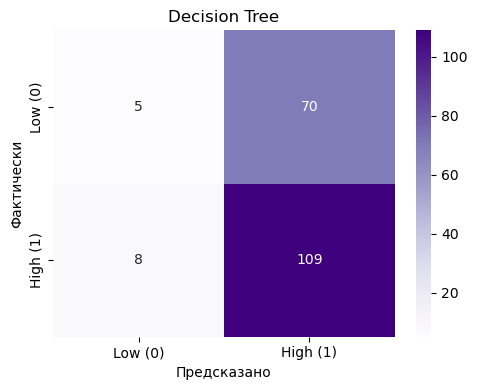

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

print("\n" + "="*50)
print("6. DECISION TREE")
print("="*50)

# Модель
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Метрики
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('Decision Tree')
plt.tight_layout()
plt.show()

# Важность признаков
importances = pd.DataFrame({
    'Признак': features,
    'Важность': dt.feature_importances_
}).sort_values('Важность', ascending=False)


ФИНАЛЬНОЕ СРАВНЕНИЕ ВСЕХ МЕТОДОВ
              Метод  Accuracy  Precision   Recall       F1
Logistic Regression  0.609375   0.609375 1.000000 0.757282
      Random Forest  0.546875   0.604167 0.743590 0.666667
                KNN  0.557292   0.606667 0.777778 0.681648
                SVM  0.593750   0.604278 0.965812 0.743421
  Gradient Boosting  0.572917   0.606061 0.854701 0.709220
      Decision Tree  0.593750   0.608939      NaN 0.736486


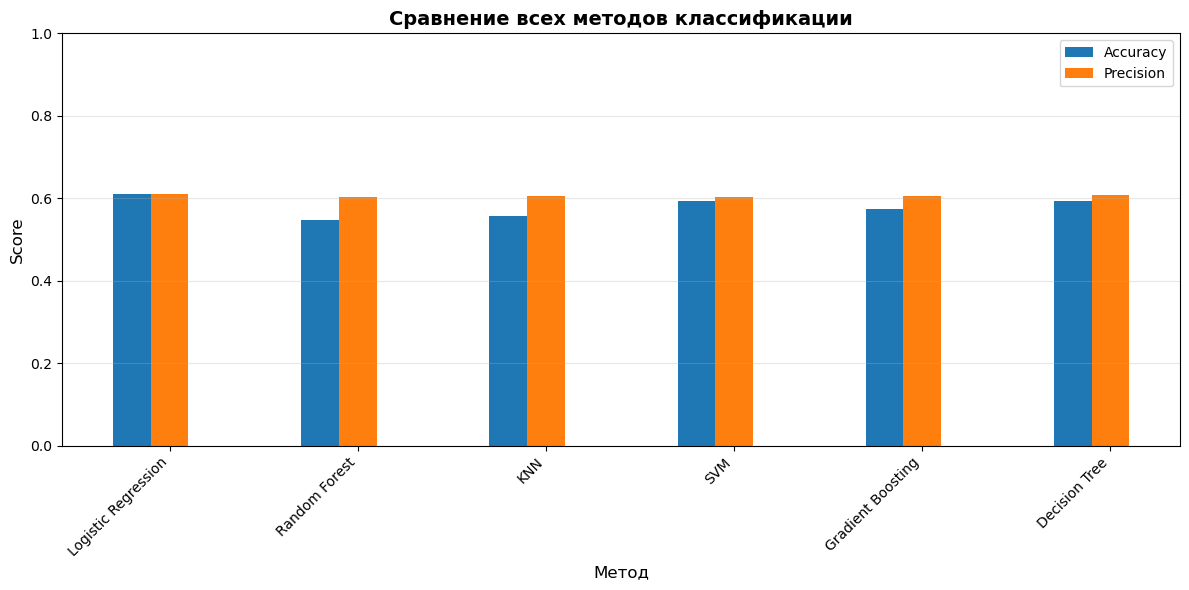


 ЛУЧШИЙ МЕТОД: Logistic Regression
   Accuracy: 0.609
   F1-Score: 0.757


In [25]:
print("\n" + "="*70)
print("ФИНАЛЬНОЕ СРАВНЕНИЕ ВСЕХ МЕТОДОВ")
print("="*70)

# Собираем все результаты
all_results = []

# 1. Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
all_results.append({
    'Метод': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
all_results.append({
    'Метод': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# 3. KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
all_results.append({
    'Метод': 'KNN',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# 4. SVM
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
all_results.append({
    'Метод': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# 5. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                 max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
all_results.append({
    'Метод': 'Gradient Boosting',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# 6. Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
all_results.append({
    'Метод': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# Таблица
results_df = pd.DataFrame(all_results)
print(results_df.to_string(index=False))

# Визуализация
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.2

plt.bar(x - width, results_df['Accuracy'], width, label='Accuracy')
plt.bar(x, results_df['Precision'], width, label='Precision')

plt.xlabel('Метод', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Сравнение всех методов классификации', fontsize=14, fontweight='bold')
plt.xticks(x, results_df['Метод'], rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Лучший метод
best_method = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\n ЛУЧШИЙ МЕТОД: {best_method['Метод']}")
print(f"   Accuracy: {best_method['Accuracy']:.3f}")
print(f"   F1-Score: {best_method['F1']:.3f}")

В этом файле мы выполняеи классификацию (6 моделей). Модели классификации продемонстрировали точность 54–61% — на уровне случайного угадывания. Это указывает на синтетическую природу датасета, где переменные генерировались независимо друг от друга. Несмотря на отрицательный результат моделирования, проект имеет высокую ценность: отработаны навыки полного цикла анализа данных, освоены ключевые метрики оценки моделей и сформировано важное понимание того, что не все данные пригодны для машинного обучения.ё

In [ ]:
import joblib
rf.fit(X_train, y_train)

# ===== СОХРАНЕНИЕ =====
joblib.dump(rf, 'random_forest_model.pkl')
print("✅ Модель сохранена!")